In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from keras.layers import BatchNormalization, Activation, MaxPooling2D
from keras.models import Model, Sequential
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.utils import plot_model


Generating Training and Validation Batches

In [3]:
img_size = 48
batch_size = 64

base_path = "C:\\Users\\arvin\\OneDrive\\Desktop\\miniproj\\"

# Data generator to augment data for training
datagen_train = ImageDataGenerator(horizontal_flip=True)
train_generator = datagen_train.flow_from_directory(base_path+"train", 
                                                    target_size=(img_size,img_size), 
                                                    color_mode='grayscale',
                                                   batch_size=batch_size,
                                                   class_mode='categorical',
                                                   shuffle=True)

# Data generator to augment data for validation
datagen_validation = ImageDataGenerator(horizontal_flip=True)
validation_generator = datagen_train.flow_from_directory(base_path+"validation", 
                                                    target_size=(img_size,img_size), 
                                                    color_mode='grayscale',
                                                   batch_size=batch_size,
                                                   class_mode='categorical',
                                                   shuffle=False)


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


CNN model building

In [4]:
model = Sequential()

# Conv Block 1
model.add(Conv2D(64, (3,3), padding='same', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Conv Block 2
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Conv Block 3
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Conv Block 4
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

# Fully connected Block 1
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected Block 2
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))

opt = Adam(learning_rate=0.0005)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

In [13]:
epochs = 15
steps_per_epoch= train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.h5",monitor='val_accuracy',
                            save_weights_only=True, mode='max',verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss' , factor=0.1, patience=2, min_lr=0.00001,model='auto')

callbacks = [checkpoint, reduce_lr]

history = model.fit(
        x= train_generator,
        steps_per_epoch=steps_per_epoch,
        epochs=epochs,
        validation_data=validation_generator,
        validation_steps=validation_steps,
        callbacks=callbacks
)

model_json = model.to_json()
with open("model.json","w") as json_file:
    json_file.write(model_json)


Epoch 1/15
450/450 [==============================] - ETA: 0s - loss: 1.7949 - accuracy: 0.3103
Epoch 1: saving model to model_weights.h5
450/450 [==============================] - 654s 1s/step - loss: 1.7949 - accuracy: 0.3103 - val_loss: 1.6731 - val_accuracy: 0.3699 - lr: 5.0000e-04
Epoch 2/15
450/450 [==============================] - ETA: 0s - loss: 1.4747 - accuracy: 0.4336
Epoch 2: saving model to model_weights.h5
450/450 [==============================] - 446s 991ms/step - loss: 1.4747 - accuracy: 0.4336 - val_loss: 1.3272 - val_accuracy: 0.4839 - lr: 5.0000e-04
Epoch 3/15
450/450 [==============================] - ETA: 0s - loss: 1.3237 - accuracy: 0.4932
Epoch 3: saving model to model_weights.h5
450/450 [==============================] - 484s 1s/step - loss: 1.3237 - accuracy: 0.4932 - val_loss: 1.2950 - val_accuracy: 0.5118 - lr: 5.0000e-04
Epoch 4/15
450/450 [==============================] - ETA: 0s - loss: 1.2423 - accuracy: 0.5245
Epoch 4: saving model to model_weights.h

## Model Training is completed and accuracy is approximately 65%

### Accuracy and Validation curves for the above model 

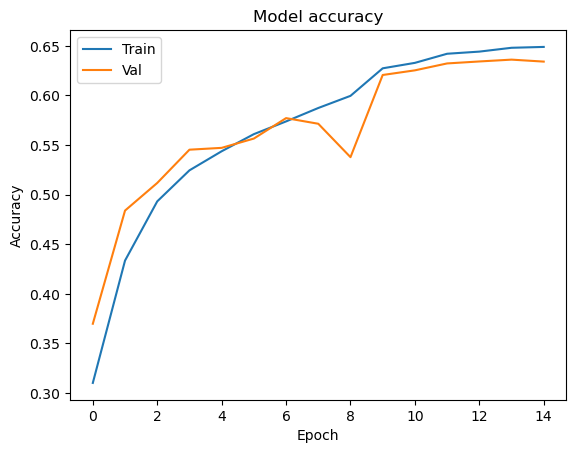

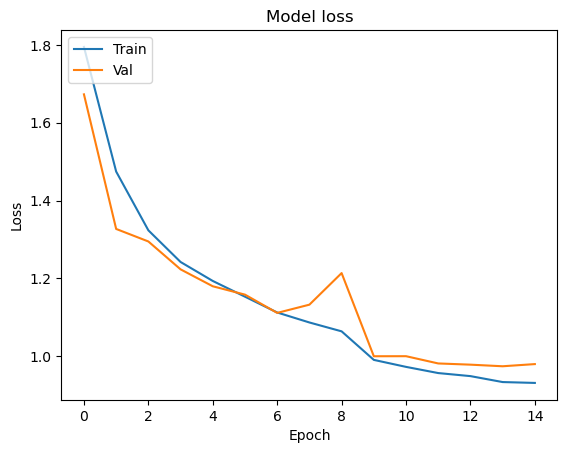

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()